# Task 1 - Prediction using Supervised Machine Learning
Predicting the percentage score of a student based on the number of study hours using Simple Linear Regression model  as it involves just two variables Hours and Scores.

### GRIPAUGUST'21


### Author: Sayantika Chakravarty

## Step 1 - Importing the standard ML Libraries

In [4]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

## Step 2 - Reading data from the link provided

In [5]:
data =pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
data.head(10) #used to display the first 10 observations of the dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 3 - Data Visualization using scatter plot

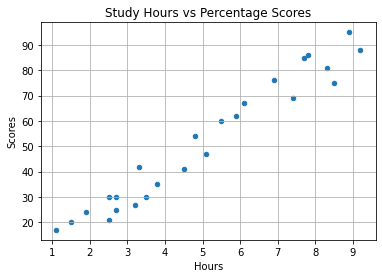

In [6]:
data.plot(kind='scatter', x='Hours', y='Scores')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.grid(True)
plt.show()

**From the scatterplot above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. Thus we build a Linear Regression Model using ML.**

## Step 4 - Dividing the data into attributes and labels ( Data Preparation) 

Here attributes(inputs) are the no. of study hours and labels(outputs) are scores of students.

In [7]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
print("Values of x",x)
print("Values of y",y)

Values of x [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Values of y [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Step 5 - Splitting the data into training and test sets
#### Using Scikit-Learn's built-in train_test_split() method

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

## Step 6 - Training Simple Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression  
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
print("Intercept:\n",model.intercept_)
print("coeffiecient:\n",model.coef_)
print("Training complete.")

Intercept:
 2.370815382341881
coeffiecient:
 [9.78856669]
Training complete.


## Step 7 - Visualization of the line of fit or the Regression Line
### The line of regression is given by: y = coefficient * x + Intercept
### From above it will be
### y =  9.78856669 x + 2.370815382341881

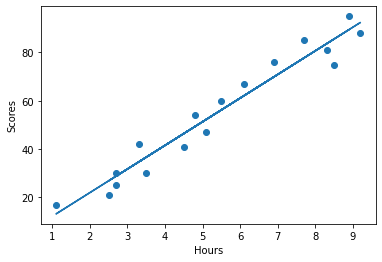

In [10]:
# Visualizing the line of regression
plt.scatter(x_train, y_train)
plt.plot(x_train,lm.predict(x_train));
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Step 8 - Predicting the score for studying 9.25 hours/day


In [11]:
print("No. of hours = 9.25")
pred_val = lm.predict([[9.25]])
print("Predicted score = ",format(pred_val[0]))

No. of hours = 9.25
Predicted score =  92.91505723477056


## Step 9 - Predicting and Testing

In [12]:
print(x_test) #Testing data - In Hours
y_pred = model.predict(x_test) #Predicting the scores
#Comparing actual vs predicted
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Step 10 - Evaluating the model
### The final step for this algorithm will be the evuluation of the model.
### This step is perticularly important to compare how well different algorithms perform on a particular dataset.
### We used the R-square metric here for evaluation.

In [13]:
x=sm.add_constant(x)
mode=sm.OLS(y,x).fit()
predictions=mode.predict(x)
print(mode.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           9.13e-17
Time:                        22:14:22   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

### The R-square value obtained is 0.953 which states that 93.5% variation in the dataset can be explained by the model we fit, that is, y = 9.78856669 x + 2.370815382341881